In [1]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



In [2]:
mydata <- read.csv('binary.csv')

In [3]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [4]:
summary(mydata)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [5]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.6.1"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



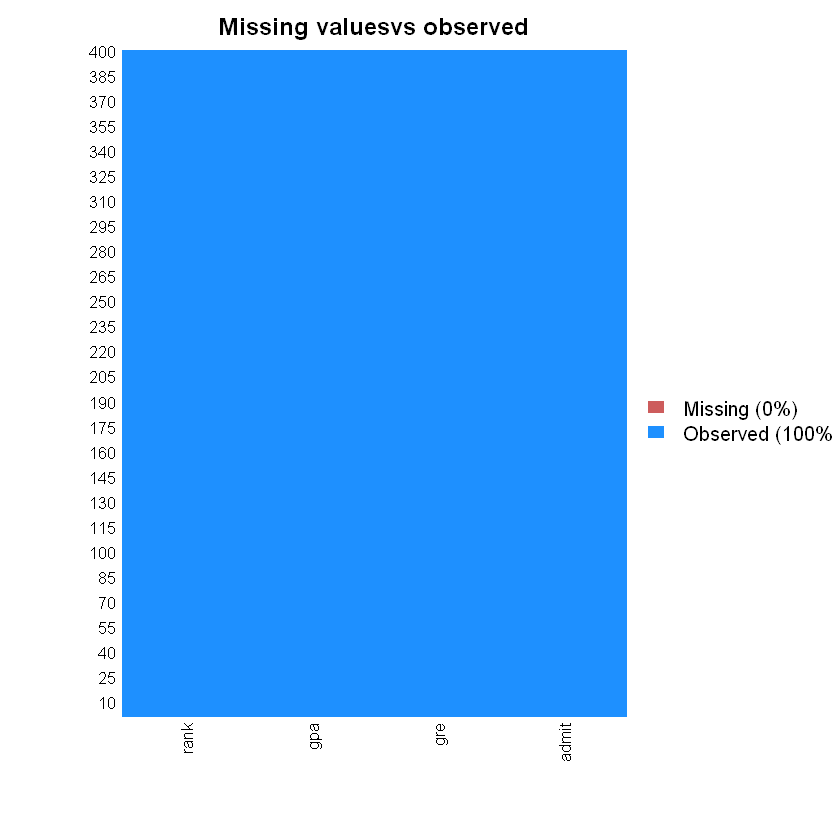

In [6]:
missmap(mydata, main='Missing valuesvs observed')

In [7]:
print(table(mydata$admit))


  0   1 
273 127 


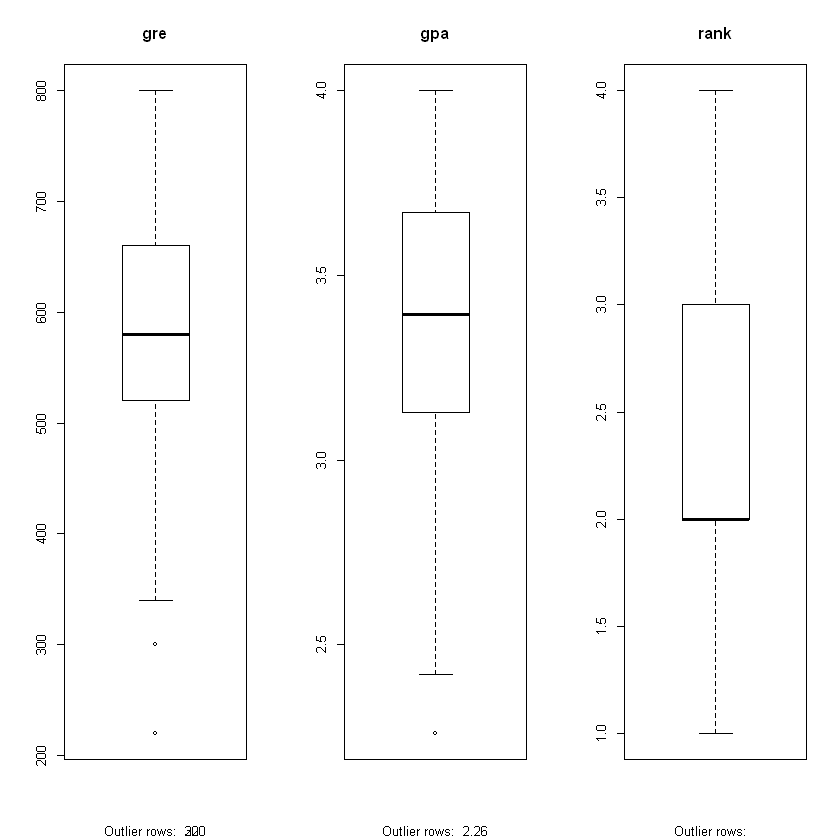

In [8]:
par(mfrow=c(1,3))
boxplot(mydata$gre, main='gre',
        sub=paste('Outlier rows: ', boxplot.stats(mydata$gre)$out))

boxplot(mydata$gpa, main='gpa',
       sub=paste('Outlier rows: ', boxplot.stats(mydata$gpa)$out))

boxplot(mydata$rank, main='rank',
       sub=paste('Outlier rows: ', boxplot.stats(mydata$rank)$out))

In [9]:
gre_outliers <- boxplot.stats(mydata$gre)$out
gre_outliers

[1] 300 300 220 300

In [10]:
length(gre_outliers)

[1] 4

In [11]:
mydata[mydata$gre %in% gre_outliers,]

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
72,0,300,2.92,4
180,0,300,3.01,3
305,0,220,2.83,3
316,1,300,2.84,2


In [12]:
gpa_outliers <- boxplot.stats(mydata$gpa)$out
gpa_outliers

[1] 2.26

In [13]:
mydata[mydata$gpa %in% gpa_outliers,]

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
290,0,420,2.26,4


In [14]:
print(paste('Before drop:',nrow(mydata)))

[1] "Before drop: 400"


In [15]:
mydata <- mydata[!(mydata$gpa %in% gpa_outliers) & !(mydata$gre %in% gre_outliers),]

In [16]:
print(paste('After drop:',nrow(mydata)))

[1] "After drop: 395"


In [17]:
correlations <- cor(mydata[,2:4])
print(correlations)

            gre         gpa        rank
gre   1.0000000  0.35937135 -0.10785090
gpa   0.3593714  1.00000000 -0.03994452
rank -0.1078509 -0.03994452  1.00000000


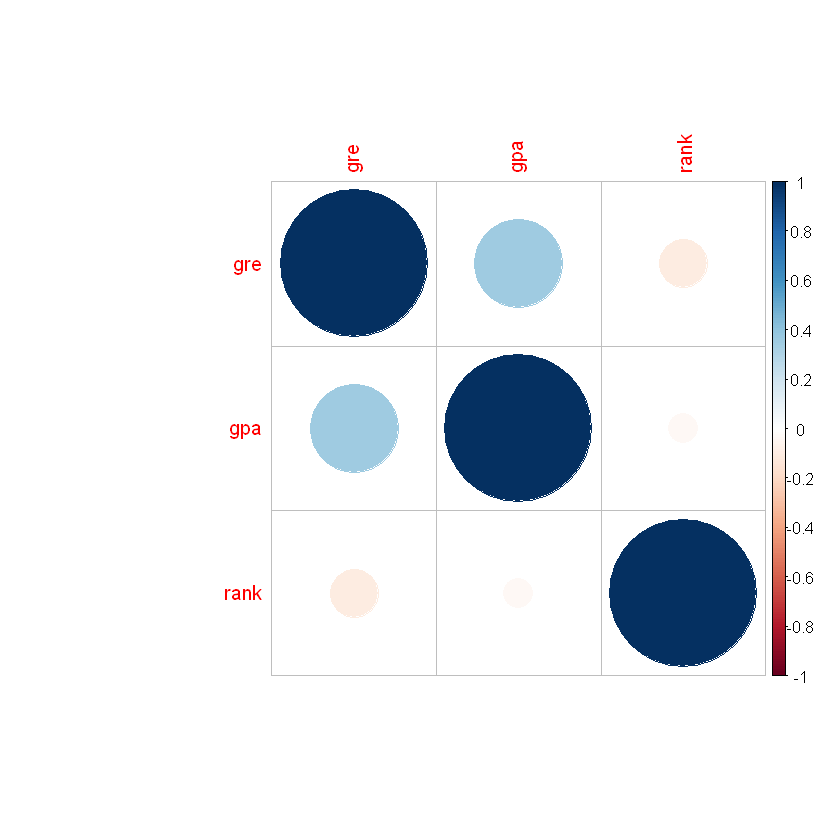

In [18]:
corrplot(correlations, method='circle')

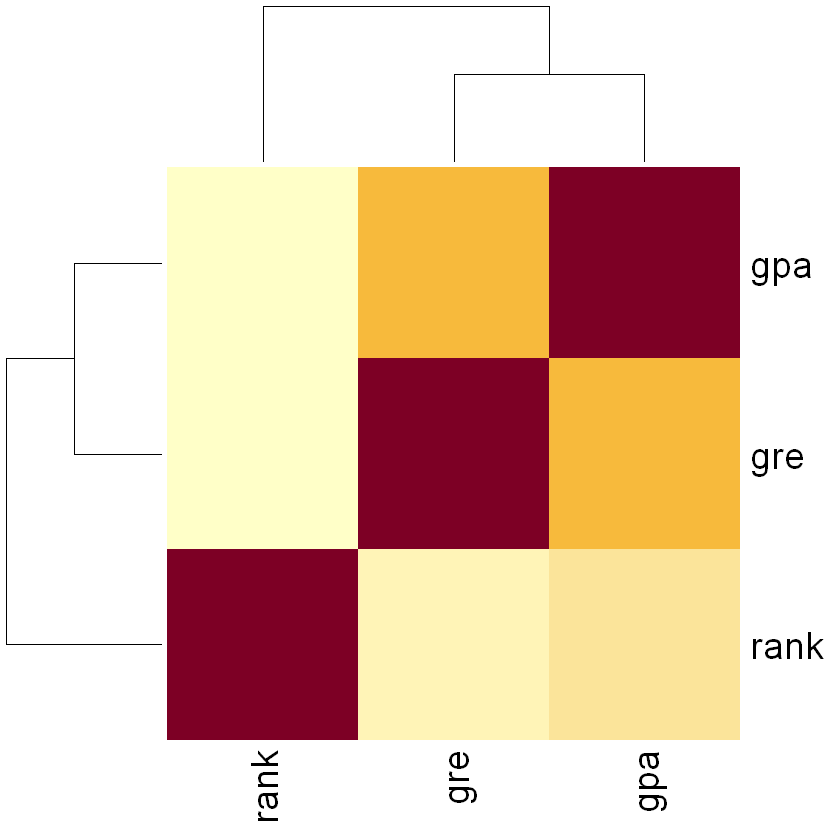

In [19]:
heatmap(correlations)

In [20]:
n = nrow(mydata)
trainIndex <- sample(1:n, size=round(0.7*n), replace=FALSE)
train = mydata[trainIndex,]
test = mydata[-trainIndex,]
print(nrow(train))
print(nrow(test))

[1] 276
[1] 119


In [21]:
mylogit <- glm(admit ~ gre + gpa + rank, data=train, family='binomial')
print(mylogit)


Call:  glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Coefficients:
(Intercept)          gre          gpa         rank  
  -3.503446     0.002584     0.752252    -0.561013  

Degrees of Freedom: 275 Total (i.e. Null);  272 Residual
Null Deviance:	    351.4 
Residual Deviance: 322.6 	AIC: 330.6


In [22]:
print(summary(mylogit))


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6159  -0.9086  -0.6306   1.1689   2.1822  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.503446   1.368781  -2.560 0.010481 *  
gre          0.002584   0.001334   1.937 0.052725 .  
gpa          0.752252   0.383867   1.960 0.050034 .  
rank        -0.561013   0.155120  -3.617 0.000298 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 351.36  on 275  degrees of freedom
Residual deviance: 322.63  on 272  degrees of freedom
AIC: 330.63

Number of Fisher Scoring iterations: 3



In [23]:
# Akaike information criterion --> Likelyhood
# AIC = -2/N ** LL + 2* k/N

In [24]:
pred = predict(mylogit, newdata=test, type='response')

In [25]:
pred[1:5]

3          5          8         11         13 
0.73342573 0.09979463 0.21844129 0.33828066 0.71273352

In [26]:
pred_value <- ifelse(pred >0.5,1,0)
print('Testdata admit vs predict (10 rows:)')
result <- data.frame(testAdmit = test$admit, Predict=pred_value)
print(head(result))

[1] "Testdata admit vs predict (10 rows:)"
   testAdmit Predict
3          1       1
5          0       0
8          0       0
11         0       0
13         1       1
14         0       0


In [27]:
accuracy <- table(pred_value, test[,'admit'])
accuracy = sum(diag(accuracy)) / sum(accuracy) # Duongcheochinh/Total
print(paste('Accuracy s1:',accuracy))

[1] "Accuracy s1: 0.73109243697479"


In [28]:
misClassificError <- mean(pred_value != test$admit)
print(paste('Accuracy s2: ',1-misClassificError))

[1] "Accuracy s2:  0.73109243697479"


In [29]:
length(pred_value)

[1] 119

In [30]:
length(test$admit)

[1] 119

In [31]:
test[,'admit']

[1] 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [38] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [75] 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
[112] 1 0 0 0 1 0 0 0

In [32]:
test$admit

[1] 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [38] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [75] 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
[112] 1 0 0 0 1 0 0 0

In [33]:
library('caret')
confusionMatrix(factor(pred_value), factor(test$admit))

Warning message:
"package 'caret' was built under R version 3.6.1"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 80 27
         1  5  7
                                          
               Accuracy : 0.7311          
                 95% CI : (0.6421, 0.8082)
    No Information Rate : 0.7143          
    P-Value [Acc > NIR] : 0.3855602       
                                          
                  Kappa : 0.1825          
                                          
 Mcnemar's Test P-Value : 0.0002054       
                                          
            Sensitivity : 0.9412          
            Specificity : 0.2059          
         Pos Pred Value : 0.7477          
         Neg Pred Value : 0.5833          
             Prevalence : 0.7143          
         Detection Rate : 0.6723          
   Detection Prevalence : 0.8992          
      Balanced Accuracy : 0.5735          
                                          
       'Positive' Class : 0               
                                    

In [34]:
y1 <- predict(mylogit,
             newdata=data.frame(gre=c(580,800),
                               gpa=c(3.4,4),
                               rank=c(3,1)),
             type='response')
y1

1         2 
0.2441846 0.7334257

In [35]:
y1 <- ifelse(y1 >0.5, 1,0)
print(paste('result: ',toString(y1)))

[1] "result:  0, 1"
